In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import json
import glob
import os
import re

from shared import *

In [2]:
base = "../exp/"
paths = glob.glob(base + "ubs_perf/*.json")
data = [json.load(open(path)) for path in paths]

In [3]:
ubs_checks = pd.DataFrame.from_records([{
    **algo,
    'graph': path_to_graph(run['args'][1]),
    'metric': run['live_weight_file']
} for run in data for algo in run['algo_runs']])

In [6]:
ubs_checks.query('rank > 9').groupby(['algo', 'rank'])['running_time_ms'].describe()

count         mean          std         min  \
algo              rank                                                
dijkstra_tree     10    102.0     0.306247     0.257550    0.036932   
                  11    104.0     0.553000     0.463374    0.030798   
                  12    105.0     1.209906     1.128206    0.040192   
                  13    120.0     3.037381     2.421593    0.193356   
                  14    113.0     8.271636    25.383669    0.605640   
                  15    127.0    23.163950    45.279308    1.145250   
                  16    112.0    25.118165    23.167948    3.766847   
                  17    117.0    57.835409    53.404903    4.301900   
                  18    133.0   120.465016    83.285915   16.762728   
                  19    130.0   326.714137   326.286859   40.127090   
                  20    137.0  1066.564891  1695.882715  109.957661   
                  21    153.0  2245.521009  3996.018928  162.913217   
lazy_rphast_naive 10    102.0     2.358952     1.144784    0.389341   
                  11    104.0     3.224045     1.491045    0.558896   
                  12    105.0     5.313335     2.197533    1.148282   
                  13    120.0     7.355976     3.478505    1.743967   
                  14    113.0    10.346939     4.069180    2.537509   
                  15    127.0    12.857157     5.835235    5.202035   
                  16    112.0    20.006457     7.289873    4.958371   
                  17    117.0    31.385735    13.733747    7.494145   
                  18    133.0    47.135805    17.080271   15.570675   
                  19    130.0    90.266932    37.631860   29.914017   
                  20    137.0   167.349250    63.583357   50.659770   
                  21    153.0   319.341239   124.185799   78.783680   
lazy_rphast_tree  10    102.0     0.045948     0.032526    0.022572   
                  11    104.0     0.057817     0.038252    0.027824   
                  12    105.0     0.087199     0.166342    0.025332   
                  13    120.0     0.180160     0.270650    0.031233   
                  14    113.0     0.180862     0.518374    0.035222   
                  15    127.0     0.524609     1.029212    0.032050   
                  16    112.0     0.271847     0.440471    0.041908   
                  17    117.0     0.361353     0.530102    0.053061   
                  18    133.0     0.471734     0.564680    0.049014   
                  19    130.0     0.722355     1.072019    0.078512   
                  20    137.0     2.152366     4.131056    0.096233   
                  21    153.0     2.881777     5.272090    0.107346   
sse_rphast        10    102.0     0.902749     0.404661    0.183858   
                  11    104.0     1.195144     0.499989    0.263852   
                  12    105.0     1.875286     0.721540    0.482159   
                  13    120.0     2.495076     1.157423    0.699819   
                  14    113.0     3.615342     1.402759    0.979804   
                  15    127.0     4.251130     1.898249    1.866892   
                  16    112.0     6.176605     2.166131    1.655665   
                  17    117.0     9.187295     3.828226    2.602745   
                  18    133.0    13.636604     5.258265    4.563725   
                  19    130.0    23.295450     8.902916    7.950673   
                  20    137.0    39.737399    14.841336   12.990200   
                  21    153.0    71.284464    26.009484   18.660826   

                               25%          50%          75%           max  
algo              rank                                                      
dijkstra_tree     10      0.134676     0.224718     0.404302      1.194001  
                  11      0.252102     0.426241     0.727179      2.997261  
                  12      0.547589     0.840604     1.498510      6.461477  
                  13      1.118361     2.323257     4.081061      9.497230  
           

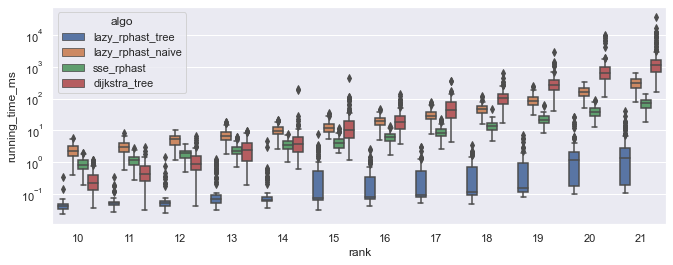

In [9]:
plt.figure(figsize=(11,4))
g = sns.boxplot(data=ubs_checks.query('rank > 9'), x='rank', y='running_time_ms', hue='algo')
g.set_yscale('log')

In [10]:
ubs_checks['log_running_time_ms'] = np.log10(ubs_checks['running_time_ms'])

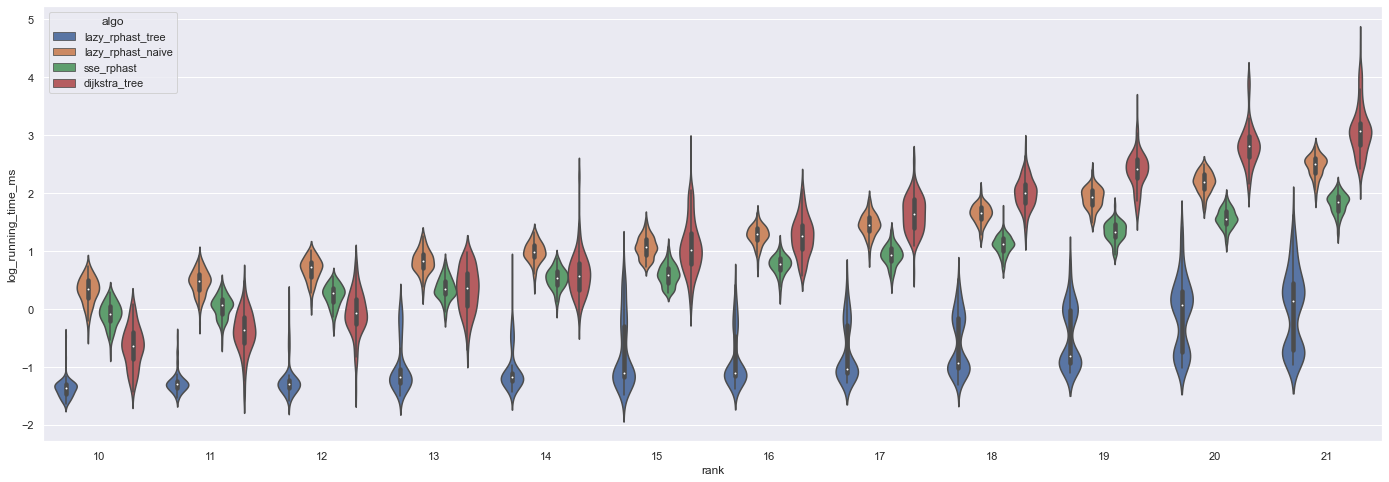

In [17]:
plt.figure(figsize=(24,8))
g = sns.violinplot(data=ubs_checks.query('rank > 9'), x='rank', y='log_running_time_ms', hue='algo', scale='width')

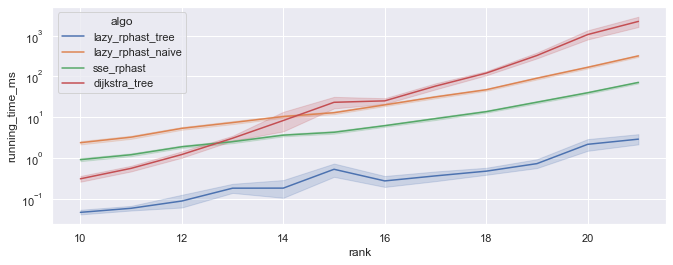

In [14]:
plt.figure(figsize=(11,4))
g = sns.lineplot(data=ubs_checks.query('rank > 9'), x='rank', y='running_time_ms', hue='algo')
g.set_yscale('log')